In [169]:
from math import *
import matplotlib.pylab as pl
import numpy as np
import scipy.optimize as opt
from tabulate import tabulate
%matplotlib inline

In [170]:

def f(x):
    return log(x+2)-x**2


In [204]:
accroot = opt.root(f,0).x[0]
accroot

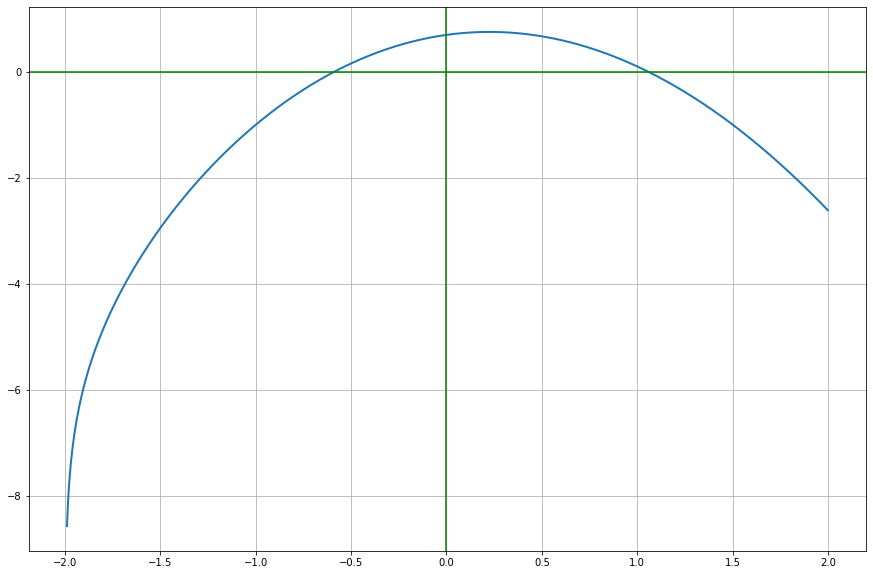

In [172]:
x = np.linspace(-1.99,2,1000)
y = [f(arg) for arg in x]
pl.figure(figsize=(15,10))
pl.plot(x,y,linewidth=2)
pl.grid(True)
pl.axhline(color='g')
pl.axvline(color='g')

In [173]:
from IPython.display import display, Markdown, Latex

In [216]:
def localize_root(func,a0,b0,epsilon):
    k = [0]
    a = [a0]
    b = [b0]
    f_a = [func(a0)]
    f_b = [func(b0)]
    med = [(a[-1]+b[-1])/2]
    f_med = [func(med[-1])]
    error = [abs(a0-b0)/2]
    while(error[-1]>=epsilon):
        if(f_med[-1]>0):
            a.append(a[-1])
            b.append(med[-1])
        elif(f_med[-1]<0):
            b.append(b[-1])
            a.append(med[-1])
        else:
            break
        k.append(k[-1]+1)
        f_a.append(func(a[-1]))
        f_b.append(func(b[-1]))
        med.append((a[-1]+b[-1])/2)
        f_med.append(func(med[-1]))
        error.append(abs(a[-1]-b[-1])/2)
    display(Markdown(tabulate([['$'+column+'$' for column in
                                ['k','a_k','b_k','f(a_k)','f(b_k)','\\frac{a_k+b_k}{2}','f(\\frac{a_k+b_k}{2})',
                                 '\\epsilon_k']],
                               *list(zip(k,a,b,f_a,f_b,med,f_med,error))],headers='firstrow',tablefmt='pipe')))
    return a[-1],b[-1]
        

In [217]:
delta = [-1,-0.5]
error = 10**-7
localization_error = 10**-2 
a,b = localize_root(f,*delta,localization_error)

\begin{tabular}{rrrrrrrr}
\hline
   \$k\$ &    \$a\_k\$ &     \$b\_k\$ &   \$f(a\_k)\$ &   \$f(b\_k)\$ &   \$\textbackslash{}frac\{a\_k+b\_k\}\{2\}\$ &   \$f(\textbackslash{}frac\{a\_k+b\_k\}\{2\})\$ &   \$\textbackslash{}epsilon\_k\$ \\
\hline
     0 & -1       & -0.5      & -1         &  0.155465  &             -0.75     &              -0.339356   &      0.25      \\
     1 & -0.75    & -0.5      & -0.339356  &  0.155465  &             -0.625    &              -0.0721713  &      0.125     \\
     2 & -0.625   & -0.5      & -0.0721713 &  0.155465  &             -0.5625   &               0.0464992  &      0.0625    \\
     3 & -0.625   & -0.5625   & -0.0721713 &  0.0464992 &             -0.59375  &              -0.0116125  &      0.03125   \\
     4 & -0.59375 & -0.5625   & -0.0116125 &  0.0464992 &             -0.578125 &               0.0177479  &      0.015625  \\
     5 & -0.59375 & -0.578125 & -0.0116125 &  0.0177479 &             -0.585938 &               0.00314401 &      0.0078125 \\
\hline
\end{tabular}

In [176]:
import sympy as s
t = s.symbols('t')

In [177]:
def phi(t):
    return t+c*f(t)

In [178]:
def fsym(x):
    return s.log(t+2)-t**2

In [179]:
c = -0.3

In [180]:
s.diff(t+c*fsym(t),t)

In [181]:
deriv = s.lambdify(t,diff(t+c*fsym(t),t))

In [182]:
x1 = np.linspace(a,b,10000)

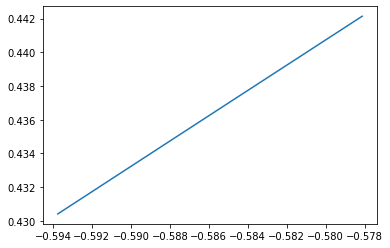

In [183]:
pl.plot(x1,list(map(deriv,x1)))

In [184]:
deriv(a)

In [185]:
deriv(b)

In [220]:
x0 = (a+b)/2
x0

In [187]:
delta1 = abs(b-x0)

In [188]:
delta1

In [189]:
q = 0.45

In [190]:
abs(x0-phi(x0))<=(1-q)*delta1

True

In [199]:
def im(a,b,x0,error):
    k = [0]
    result = [x0]
    eps = [float('inf')]
    while(eps[-1]>=error):
        result.append(phi(result[-1]))
        eps.append(abs(result[-1]-result[-2]))
        k.append(k[-1]+1)
    return k,result,eps


In [197]:
df = s.lambdify(t,s.diff(fsym(t),t))

def newton(a,b,x0,error):
    k = [0]
    result = [x0]
    eps = [float('inf')]
    while(eps[-1]>=error):
        result.append(result[-1]-f(result[-1])/df(result[-1]))
        eps.append(abs(result[-1]-result[-2]))
        k.append(k[-1]+1)
    return k,result,eps


In [209]:
import itertools as it

In [219]:
k1,res1,eps1 = im(a,b,x0,error)
k2,res2,eps2 = newton(a,b,x0,error)
print(tabulate([*list(it.zip_longest(k1,res1,eps1,res2,eps2,fillvalue='-'))],tablefmt='pipe',floatfmt='.9f'))

\begin{tabular}{rrrll}
\hline
  0 & -0.5859375 & inf         & -0.5859375          & inf                   \\
  1 & -0.5868807 &   0.0009432 & -0.5876106865525098 & 0.0016731865525098089 \\
  2 & -0.5872919 &   0.0004112 & -0.5876088279784095 & 1.858574100288557e-06 \\
  3 & -0.5874709 &   0.0001790 & -0.5876088279761155 & 2.294053835782961e-12 \\
  4 & -0.5875488 &   0.0000779 & -                   & -                     \\
  5 & -0.5875827 &   0.0000339 & -                   & -                     \\
  6 & -0.5875975 &   0.0000147 & -                   & -                     \\
  7 & -0.5876039 &   0.0000064 & -                   & -                     \\
  8 & -0.5876067 &   0.0000028 & -                   & -                     \\
  9 & -0.5876079 &   0.0000012 & -                   & -                     \\
 10 & -0.5876084 &   0.0000005 & -                   & -                     \\
 11 & -0.5876087 &   0.0000002 & -                   & -                     \\
 12 & -0.5

In [225]:
h = -f(x0)/df(x0)
ddf = s.lambdify(t,s.diff(fsym(t),t,2))

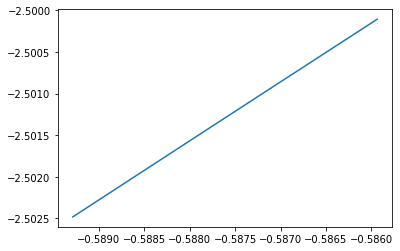

In [234]:
x5 = np.linspace(x0,x0+2*h,1000)
pl.plot(x5,list(map(ddf,x5)))


In [236]:
ddf(x0+2*h)
print(df(x0))

1.879057320441989


In [237]:
2*0.001673*2.5024